## Evaluation Metrics for Classification ML models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

<hr>

### 1. Confusion Matrix

Cross table menampilkan jumlah data antara: y True, y False, yp True, yp False

In [2]:
# Misal data aktual = y, prediksi model = yp
y = ['Yes', 'No', 'Yes', 'No', 'Yes', 'No']
yp = ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes']

Confusion Matrix for Binary Classification

-|pred "Yes"|pred "No"
---|---|---
__aktual "Yes"__|__3__|__0__
__aktual "No"__|__2__|__1__

In [3]:
from sklearn.metrics import confusion_matrix

In [12]:
# labels = nilai di y aktual
cm = confusion_matrix(y, yp, labels=["Yes", "No"])
# cm = confusion_matrix(y, yp)
cm

array([[3, 0],
       [2, 1]])

In [11]:
dfcm = pd.DataFrame(
    cm, columns=['Pred Y', 'Pred N'], index=['Actual Y', 'Actual N']
)
dfcm

,Pred Y,Pred N
Actual Y,1,2
Actual N,0,3


- __True__: data prediksi == data aktual
- __False__: data prediksi != data aktual
- __Positive__: prediksi positif / 1 / Yes
- __Negative__: prediksi negatif / 0 / No

<hr>

- __True Positive (TP)__: prediksi __YES__, aktual __YES__
- __True Negative (TN)__: prediksi __NO__, aktual __NO__
- __False Positif (FP)__: prediksi __YES__, aktual __NO__
- __False Negatif (FN)__: prediksi __NO__, aktual __YES__

-|pred "Yes"|pred "No"
---|---|---
__aktual "Yes"__|__TP = 3__|__FN = 0__
__aktual "No"__|__FP = 2__|__TN = 1__

In [6]:
tp, fn, fp, tn = confusion_matrix(y, yp, labels=["Yes", "No"]).reshape(-1,)
tp, fn, fp, tn

(3, 0, 2, 1)

<hr>

### 2. Confusion Matrix for Binary Classification Example

In [52]:
x = np.array(range(1, 11))
y = [0,0,0,0,1,0,1,1,1,1]

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression()
model.fit(x.reshape(-1, 1), y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
yp = model.predict(x.reshape(-1, 1))
yp

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [56]:
# create confusion matrix manually
print(y)
print(list(yp))

[0, 0, 0, 0, 1, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


-|Pred 1|Pred 0
---|---|---
__Aktual 1__|__TP = 4__|__FN = 1__
__Aktual 0__|__FP = 1__|__TN = 4__

In [57]:
cm = confusion_matrix(y, yp, labels=[1, 0])
cm

array([[4, 1],
       [1, 4]], dtype=int64)

In [58]:
dfcm = pd.DataFrame(
    cm, columns=['Pred 1', 'Pred 0'], index=['Aktual 1', 'Aktual 0']
)
dfcm

,Pred 1,Pred 0
Aktual 1,4,1
Aktual 0,1,4


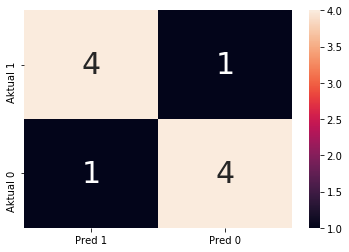

In [59]:
# confusion matrix plot
sb.heatmap(dfcm, annot=True, annot_kws={'size': 30})

In [60]:
# sklearn confusion matrix plot (based on matplotlib)
from sklearn.metrics import plot_confusion_matrix

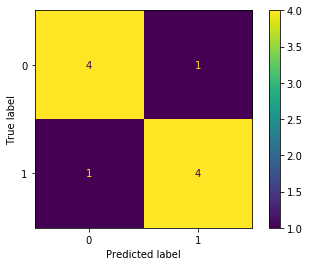

In [61]:
plot_confusion_matrix(
    model, x.reshape(-1, 1), y
)

<hr>

### 3. Confusion Matrix for Multi-class Classification

Non-binary classification a.k.a Multi-class classification

In [62]:
y = ["kura-kura", "penyu", "platipus", "kura-kura", "penyu", "platipus"]
yp = ["kura-kura", "kura-kura", "platipus", "penyu", "penyu", "platipus"]

-|Pred Kura|Pred Penyu|Pred Platipus
---|---|---|---
__Aktual Kura__|__1__|__1__|__0__
__Aktual Penyu__|__1__|__1__|__0__
__Aktual Platipus__|__0__|__0__|__2__

In [64]:
cm = confusion_matrix(y, yp, labels=["kura-kura", "penyu", "platipus"])
cm

array([[1, 1, 0],
       [1, 1, 0],
       [0, 0, 2]], dtype=int64)

In [65]:
dfcm = pd.DataFrame(
    cm, 
    columns=['Pred Kura', 'Pred Penyu', 'Pred Platipus'],
    index=['Aktual Kura', 'Aktual Penyu', 'Aktual Platipus']
)
dfcm

,Pred Kura,Pred Penyu,Pred Platipus
Aktual Kura,1,1,0
Aktual Penyu,1,1,0
Aktual Platipus,0,0,2


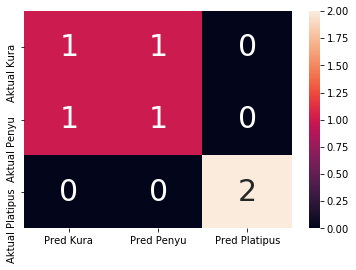

In [67]:
sb.heatmap(dfcm, annot = True, annot_kws={'size': 30})

<hr>

### 4. TP, TN, FP & FN on Confusion Matrix for Multi-class Classification

- TP, TN, FP & FN for label = __'Kura-Kura'__
- TP, TN, FP & FN for label = __'Penyu'__
- TP, TN, FP & FN for label = __'Platipus'__

__*a. TP, TN, FP & FN for label = 'Kura-Kura'*__

-|Pred Kura|Pred Penyu|Pred Platipus
---|---|---|---
__Aktual Kura__|__$\textrm{TP}_\textrm{kura}$ = 1__|__$\textrm{FN}_\textrm{kura}$ = 1__|__$\textrm{FN}_\textrm{kura}$ = 0__
__Aktual Penyu__|__$\textrm{FP}_\textrm{kura}$ = 1__|__$\textrm{TN}_\textrm{kura}$ = 1__|__$\textrm{TN}_\textrm{kura}$ = 0__
__Aktual Platipus__|__$\textrm{FP}_\textrm{kura}$ =0__|__$\textrm{TN}_\textrm{kura}$ = 0__|__$\textrm{TN}_\textrm{kura}$ = 2__

In [71]:
tpkura = 1
fpkura = 1 + 0
fnkura = 1 + 0
tnkura = 1 + 0 + 0 + 2
tpkura, fpkura, fnkura, tnkura

(1, 1, 1, 3)

__*b. TP, TN, FP & FN for label = 'Penyu'*__

-|Pred Kura|Pred Penyu|Pred Platipus
---|---|---|---
__Aktual Kura__|__$\textrm{TN}_\textrm{penyu}$ = 1__|__$\textrm{FP}_\textrm{penyu}$ = 1__|__$\textrm{TN}_\textrm{penyu}$ = 0__
__Aktual Penyu__|__$\textrm{FN}_\textrm{penyu}$ = 1__|__$\textrm{TP}_\textrm{penyu}$ = 1__|__$\textrm{FN}_\textrm{penyu}$ = 0__
__Aktual Platipus__|__$\textrm{TN}_\textrm{penyu}$ = 0__|__$\textrm{FP}_\textrm{penyu}$ = 0__|__$\textrm{TN}_\textrm{penyu}$ = 2__

In [72]:
tppenyu = 1
fppenyu = 1 + 0
tnpenyu = 1 + 0 + 0 + 2
fnpenyu = 1 + 0
tppenyu, fppenyu, tnpenyu, fnpenyu

(1, 1, 3, 1)

__*c. TP, TN, FP & FN for label = 'Platipus'*__

-|Pred Kura|Pred Penyu|Pred Platipus
---|---|---|---
__Aktual Kura__|__$\textrm{TN}_\textrm{platipus}$ = 1__|__$\textrm{TN}_\textrm{platipus}$ = 1__|__$\textrm{FP}_\textrm{platipus}$ = 0__
__Aktual Penyu__|__$\textrm{TN}_\textrm{platipus}$ = 1__|__$\textrm{TN}_\textrm{platipus}$ = 1__|__$\textrm{FP}_\textrm{platipus}$ = 0__
__Aktual Platipus__|__$\textrm{FN}_\textrm{platipus}$ = 0__|__$\textrm{FN}_\textrm{platipus}$ = 0__|__$\textrm{TP}_\textrm{platipus}$ = 2__

In [73]:
tppla = 2
fppla = 0 + 0
tnpla = 1 + 1 + 1 + 1
fnpla = 0 + 0
tppla, fppla, tnpla, fnpla

(2, 0, 4, 0)

In [74]:
print(tpkura, fpkura, fnkura, tnkura)
print(tppenyu, fppenyu, tnpenyu, fnpenyu)
print(tppla, fppla, tnpla, fnpla)

1 1 1 3
1 1 3 1
2 0 4 0
